In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import matplotlib.path as mpath
import matplotlib.cm as cm

import cmocean

In [5]:
def plot_positions_one_run(run):
    file='/bettik/alberta/small-arctic-10km-sidfex/experiments/'+str(run)+'/SIDFEx_Drifters_20060202.nc'
    ds=xr.open_dataset(file)
    NT,Nx,Ny=ds.longitude.shape
    
    plt.figure(figsize=(15, 15))
    ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
    ax.set_extent([-180, 180, 70, 90], ccrs.PlateCarree())

    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)

    land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    colors = cm.rainbow(np.linspace(0, 1, Nx))
    for x in np.arange(Nx):
        plt.scatter(ds.longitude[:,x,:],ds.latitude[:,x,:],c=ds.time,s=0.1,transform=ccrs.PlateCarree())
    plt.title('Position of drifters for run '+str(run))
    plt.savefig('/bettik/alberta/plots_nextsim/plots-on-dahu/plots/map-position-drifters-run-'+str(run)+'.png')

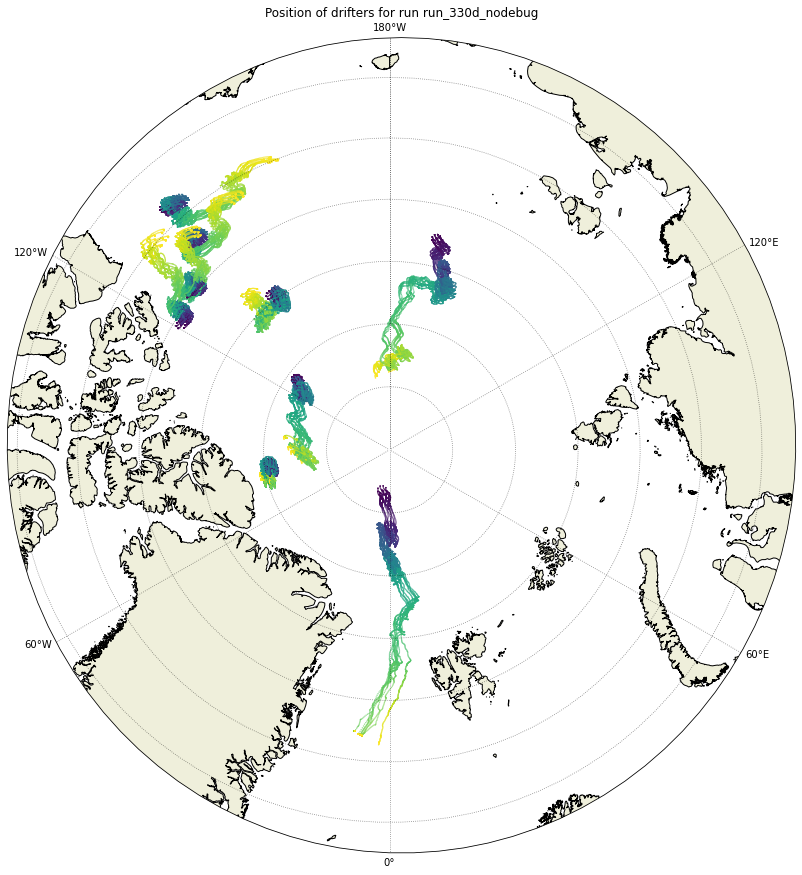

In [7]:
plot_positions_one_run('run_330d_nodebug')